In [ ]:
####### START FROM THIS CELL #######
install.packages("googledrive")
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# TYPE "1"
# GO TO THE LINK (NEED TO SIGN IN TO GOOGLE) AND COPY THE CODE
# PASTE BACK INTO THE BOX
# CAN STOP THIS CELL IN ABOUT 10 SEC TO RUN THE NEXT ONE
drive_auth()
drive_ls()

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=b7135e8b7d8a50818fe8b13ef796923a&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWJfNXFsbWFVVlE4YWFRTWh2cXA3ZUVVcWJZV1NsbzlnbW1YVFVfQlpWdXIyU2NCMWRyZngzbUI1aWZ6NUNwWnZpYTA3USIsInN0YXRlIjoiYjcxMzVlOGI3ZDhhNTA4MThmZThiMTNlZjc5NjkyM2EifQ==


In [ ]:
drive_download("Life Expectancy Data Updated.csv", path = "Life Expectancy Data Updated.csv", overwrite = TRUE)

File downloaded:

• Life Expectancy Data Updated.csv <id: 1Sbx9l2NwNQrosl3IWy1oHUwKA2a3Ov6C>

Saved locally as:

• Life Expectancy Data Updated.csv



In [ ]:
data <- read.csv("Life Expectancy Data Updated.csv")
head(data)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,⋯,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,⋯,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
2,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,⋯,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
3,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,⋯,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
4,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,⋯,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
5,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,⋯,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
6,Costa Rica,Central America and Caribbean,2006,9.8,11.2,95.2200,4.19,88,86,26.4,⋯,89,0.16,9110,4.35,2.0,1.9,7.9,0,1,78.2


In [ ]:
data$Status <- ifelse(
  data$Economy_status_Developed == 1 & data$Economy_status_Developing == 0, "Developed",
  ifelse(data$Economy_status_Developed == 0 & data$Economy_status_Developing == 1, "Developing", NA)
)

In [ ]:
# Column names
names(data)

[1] "Country"                     "Region"                     
 [3] "Year"                        "Infant_deaths"              
 [5] "Under_five_deaths"           "Adult_mortality"            
 [7] "Alcohol_consumption"         "Hepatitis_B"                
 [9] "Measles"                     "BMI"                        
[11] "Polio"                       "Diphtheria"                 
[13] "Incidents_HIV"               "GDP_per_capita"             
[15] "Population_mln"              "Thinness_ten_nineteen_years"
[17] "Thinness_five_nine_years"    "Schooling"                  
[19] "Economy_status_Developed"    "Economy_status_Developing"  
[21] "Life_expectancy"             "Status"

In [ ]:
# Shorten Data Set with 13 chosen re-named columns
data = data[,c('Life_expectancy','Status','Country','Population_mln','GDP_per_capita','Alcohol_consumption','Hepatitis_B','Polio','Diphtheria','BMI','Measles','Schooling', 'Year')]
colnames(data) = c('Life_Expectancy','Status','Country','Population','GDP','Alcohol','Hepatitis_B','Polio','Diphtheria','BMI','Measles','Schooling', 'Year')
head(data)

,Life_Expectancy,Status,Country,Population,GDP,Alcohol,Hepatitis_B,Polio,Diphtheria,BMI,Measles,Schooling,Year
,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
1,76.5,Developing,Turkiye,78.53,11006,1.32,97,97,97,27.8,65,7.8,2015
2,82.8,Developed,Spain,46.44,25742,10.35,97,97,97,26.0,94,9.7,2015
3,65.4,Developing,India,1183.21,1076,1.57,60,67,64,21.2,35,5.0,2007
4,67.0,Developing,Guyana,0.75,4146,5.68,93,92,93,25.3,74,7.9,2006
5,81.7,Developed,Israel,7.91,33995,2.89,97,94,94,27.0,89,12.8,2012
6,78.2,Developing,Costa Rica,4.35,9110,4.19,88,89,89,26.4,86,7.9,2006


In [ ]:
# Dataset size
dim(data)

[1] 2864   13

In [ ]:
summary(data)
print(paste("The number of columns having N.A values is " , sum(rowSums(is.na(data)) > 0) ) )

 Life_Expectancy    Status            Country            Population      
 Min.   :39.40   Length:2864        Length:2864        Min.   :   0.080  
 1st Qu.:62.70   Class :character   Class :character   1st Qu.:   2.098  
 Median :71.40   Mode  :character   Mode  :character   Median :   7.850  
 Mean   :68.86                                         Mean   :  36.676  
 3rd Qu.:75.40                                         3rd Qu.:  23.688  
 Max.   :83.80                                         Max.   :1379.860  
      GDP            Alcohol        Hepatitis_B        Polio     
 Min.   :   148   Min.   : 0.000   Min.   :12.00   Min.   : 8.0  
 1st Qu.:  1416   1st Qu.: 1.200   1st Qu.:78.00   1st Qu.:81.0  
 Median :  4217   Median : 4.020   Median :89.00   Median :93.0  
 Mean   : 11541   Mean   : 4.821   Mean   :84.29   Mean   :86.5  
 3rd Qu.: 12557   3rd Qu.: 7.777   3rd Qu.:96.00   3rd Qu.:97.0  
 Max.   :112418   Max.   :17.870   Max.   :99.00   Max.   :99.0  
   Diphtheria       

[1] "The number of columns having N.A values is  0"


In [ ]:
cleaned_data = data
table( cleaned_data$Year )


2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 
 179  179  179  179  179  179  179  179  179  179  179  179  179  179  179  179 

In [ ]:
# Cleaned dataset size
dim(cleaned_data)

###### UNTIL HERE ######

[1] 2864   13

In [ ]:
###### Final Dataset ######
####### START FROM THIS CELL #######

final_data = cleaned_data

final_data$Population = log(final_data$Population)
final_data$GDP = log(final_data$GDP)
#final_data$Percentage_Expenditure = log(final_data$Percentage_Expenditure)
#final_data$Income_Composition = exp(final_data$Income_Composition)

# Rename columns to indicate transformations
colnames(final_data)[colnames(final_data) == "Population"] = "Log_Population"
colnames(final_data)[colnames(final_data) == "GDP"] = "Log_GDP"
#colnames(final_data)[colnames(final_data) == "Percentage_Expenditure"] = "Log_Percentage_Expenditure"
#colnames(final_data)[colnames(final_data) == "Income_Composition"] = "Exp_Income_Composition"

head(final_data)

,Life_Expectancy,Status,Country,Log_Population,Log_GDP,Alcohol,Hepatitis_B,Polio,Diphtheria,BMI,Measles,Schooling,Year
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>
1,76.5,Developing,Turkiye,4.3634807,9.306196,1.32,97,97,97,27.8,65,7.8,2015
2,82.8,Developed,Spain,3.8381612,10.155879,10.35,97,97,97,26.0,94,9.7,2015
3,65.4,Developing,India,7.0759864,6.981006,1.57,60,67,64,21.2,35,5.0,2007
4,67.0,Developing,Guyana,-0.2876821,8.329899,5.68,93,92,93,25.3,74,7.9,2006
5,81.7,Developed,Israel,2.0681278,10.433969,2.89,97,94,94,27.0,89,12.8,2012
6,78.2,Developing,Costa Rica,1.4701758,9.117128,4.19,88,89,89,26.4,86,7.9,2006


In [ ]:
dim(final_data)
###### UNTIL HERE ######

[1] 2864   13

In [ ]:
# LE ~ Population

lm_model <- lm(Life_Expectancy ~ Log_Population, data = final_data)
summary(lm_model)


Call:
lm(formula = Life_Expectancy ~ Log_Population, data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.518  -6.172   2.502   6.696  15.436 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    69.17134    0.24744 279.546   <2e-16 ***
Log_Population -0.16653    0.09204  -1.809   0.0705 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.402 on 2862 degrees of freedom
Multiple R-squared:  0.001142,	Adjusted R-squared:  0.0007935 
F-statistic: 3.274 on 1 and 2862 DF,  p-value: 0.07051


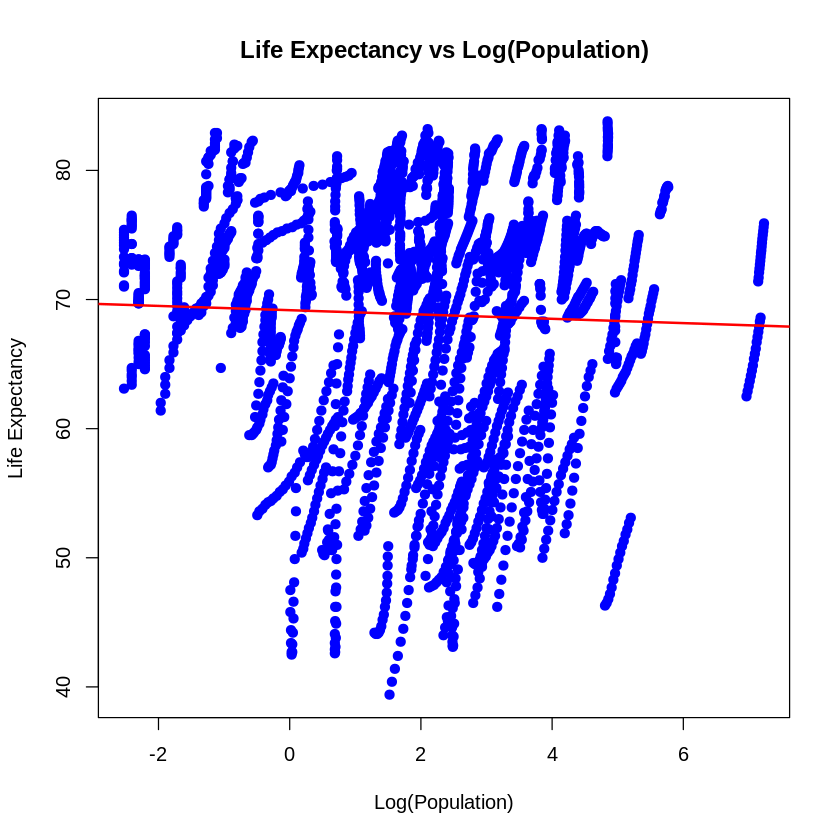

In [ ]:
# Scatter plot with regression line
plot(final_data$Log_Population, final_data$Life_Expectancy,
     main = "Life Expectancy vs Log(Population)",
     xlab = "Log(Population)",
     ylab = "Life Expectancy",
     col = "blue",
     pch = 19)

# Add regression line
abline(lm(Life_Expectancy ~ Log_Population, data = final_data), col = "red", lwd = 2)

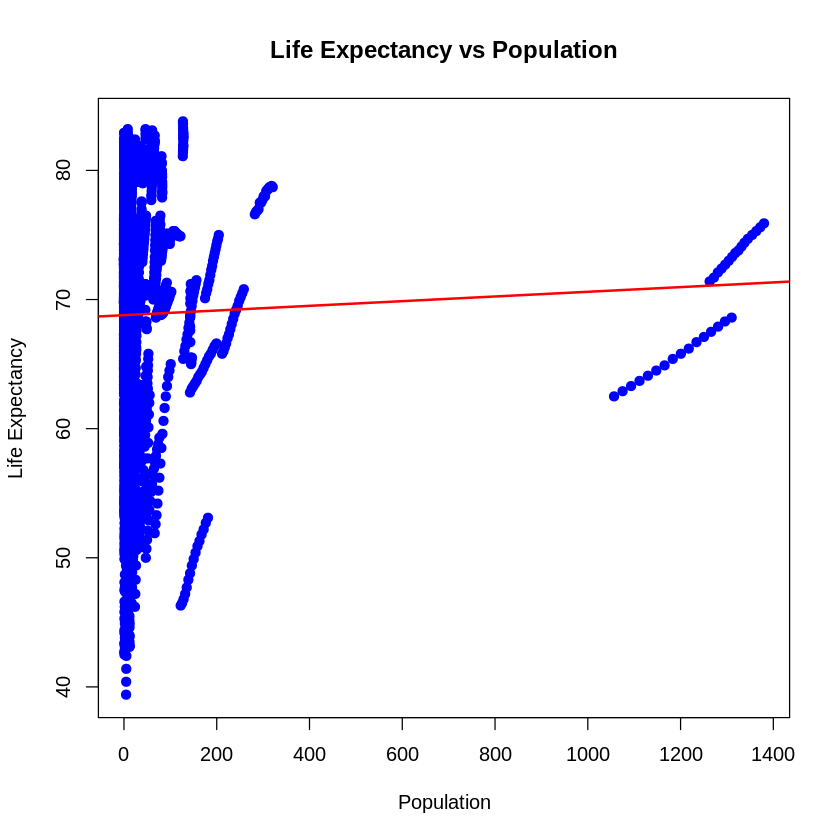

In [ ]:
# Scatter plot with regression line
plot(cleaned_data$Population, cleaned_data$Life_Expectancy,
     main = "Life Expectancy vs Population",
     xlab = "Population",
     ylab = "Life Expectancy",
     col = "blue",
     pch = 19)

# Add regression line
abline(lm(Life_Expectancy ~ Population, data = cleaned_data), col = "red", lwd = 2)

In [ ]:
# LE ~ GDP

lm_model <- lm(Life_Expectancy ~ Log_GDP, data = final_data)
summary(lm_model)


Call:
lm(formula = Life_Expectancy ~ Log_GDP, data = final_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.2225  -2.4611   0.8514   3.7787  11.1199 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.33780    0.62860   40.31   <2e-16 ***
Log_GDP      5.18114    0.07376   70.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.7 on 2862 degrees of freedom
Multiple R-squared:  0.6329,	Adjusted R-squared:  0.6328 
F-statistic:  4934 on 1 and 2862 DF,  p-value: < 2.2e-16


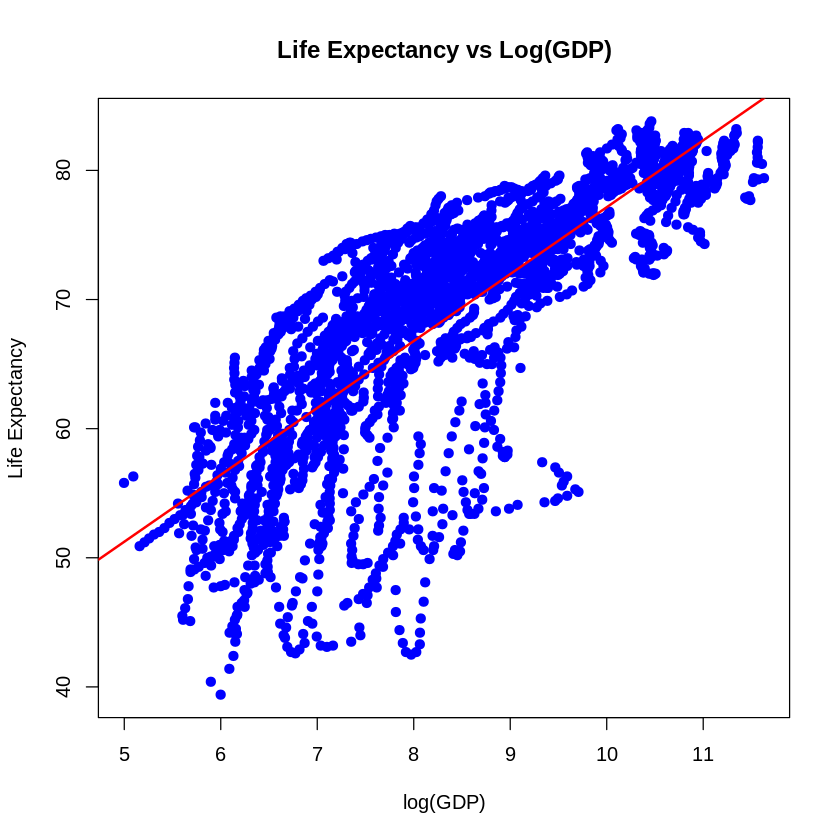

In [ ]:
# Scatter plot with regression line
plot(final_data$Log_GDP, final_data$Life_Expectancy,
     main = "Life Expectancy vs Log(GDP)",
     xlab = "log(GDP)",
     ylab = "Life Expectancy",
     col = "blue",
     pch = 19)

# Add regression line
abline(lm(Life_Expectancy ~ Log_GDP, data = final_data), col = "red", lwd = 2)

In [ ]:
# LE ~ Schooling

lm_model <- lm(Life_Expectancy ~ Schooling, data = final_data)
summary(lm_model)


Call:
lm(formula = Life_Expectancy ~ Schooling, data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.948  -3.736   1.236   4.811  14.003 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 52.27708    0.31190  167.61   <2e-16 ***
Schooling    2.17227    0.03774   57.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.404 on 2862 degrees of freedom
Multiple R-squared:  0.5365,	Adjusted R-squared:  0.5364 
F-statistic:  3313 on 1 and 2862 DF,  p-value: < 2.2e-16


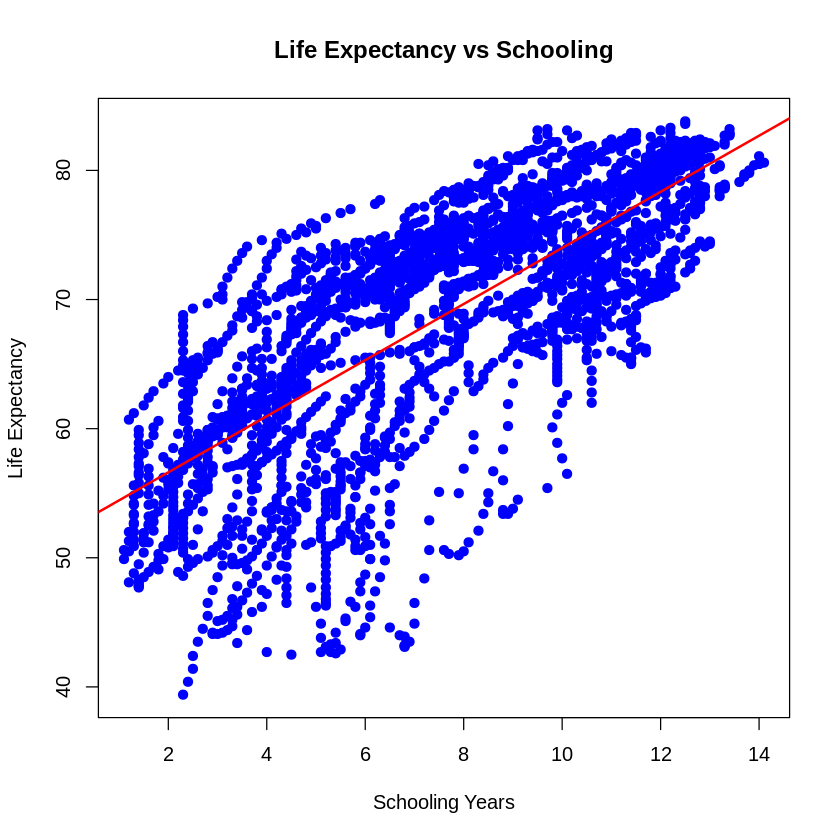

In [ ]:
# Scatter plot with regression line
plot(final_data$Schooling, final_data$Life_Expectancy,
     main = "Life Expectancy vs Schooling",
     xlab = "Schooling Years",
     ylab = "Life Expectancy",
     col = "blue",
     pch = 19)

# Add regression line
abline(lm(Life_Expectancy ~ Schooling, data = final_data), col = "red", lwd = 2)

In [ ]:
# LE ~ Alcohol

lm_model <- lm(Life_Expectancy ~ Alcohol, data = final_data)
summary(lm_model)


Call:
lm(formula = Life_Expectancy ~ Alcohol, data = final_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.123  -4.383   1.811   6.355  16.673 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 64.31076    0.25311  254.08   <2e-16 ***
Alcohol      0.94284    0.04048   23.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.625 on 2862 degrees of freedom
Multiple R-squared:  0.1593,	Adjusted R-squared:  0.159 
F-statistic: 542.4 on 1 and 2862 DF,  p-value: < 2.2e-16


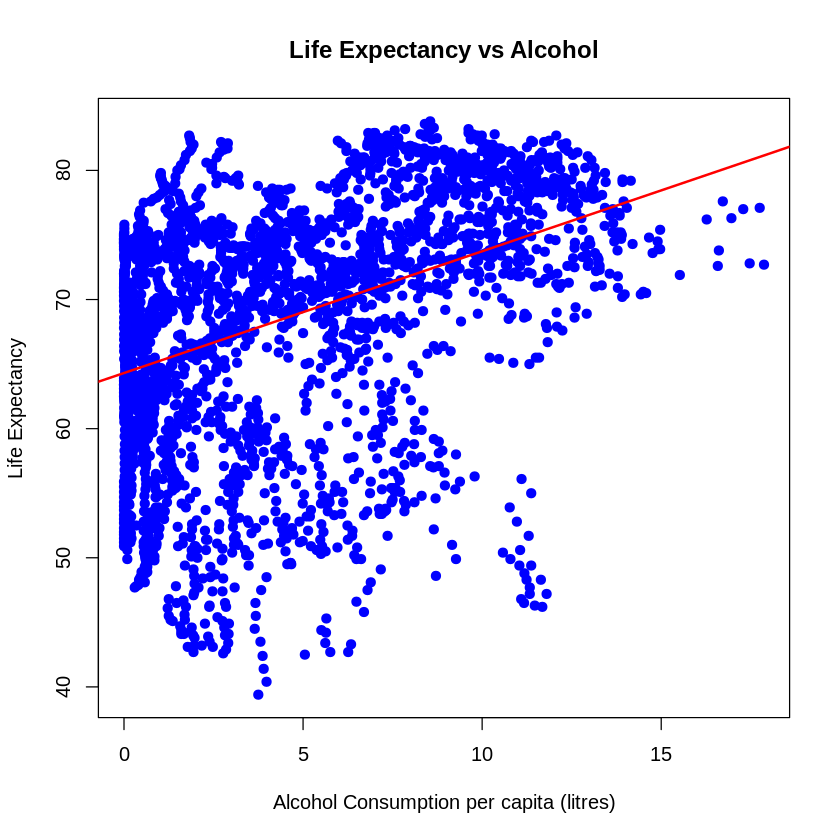

In [ ]:
# Scatter plot with regression line
plot(final_data$Alcohol, final_data$Life_Expectancy,
     main = "Life Expectancy vs Alcohol",
     xlab = "Alcohol Consumption per capita (litres)",
     ylab = "Life Expectancy",
     col = "blue",
     pch = 19)

# Add regression line
abline(lm(Life_Expectancy ~ Alcohol, data = final_data), col = "red", lwd = 2)

In [ ]:
# LE ~ BMI

lm_model <- lm(Life_Expectancy ~ BMI, data = final_data)
summary(lm_model)


Call:
lm(formula = Life_Expectancy ~ BMI, data = final_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.6371  -4.4504   0.7473   5.0194  20.9291 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.6333     1.6134   2.872  0.00411 ** 
BMI           2.5655     0.0642  39.959  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.537 on 2862 degrees of freedom
Multiple R-squared:  0.3581,	Adjusted R-squared:  0.3579 
F-statistic:  1597 on 1 and 2862 DF,  p-value: < 2.2e-16


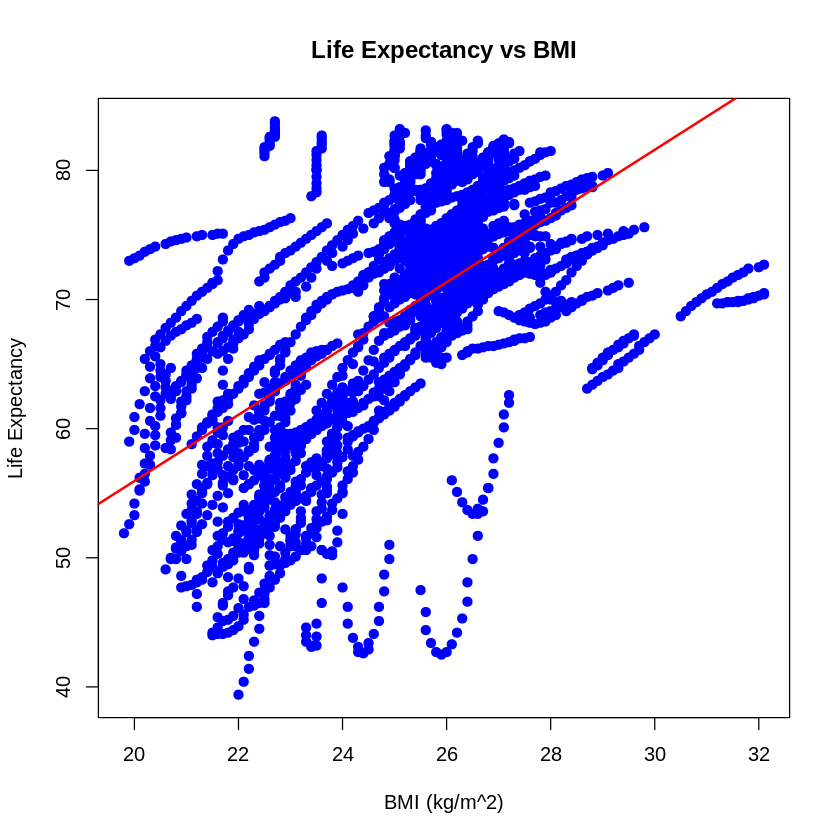

In [ ]:
# Scatter plot with regression line
plot(final_data$BMI, final_data$Life_Expectancy,
     main = "Life Expectancy vs BMI",
     xlab = "BMI (kg/m^2)",
     ylab = "Life Expectancy",
     col = "blue",
     pch = 19)

# Add regression line
abline(lm(Life_Expectancy ~ BMI, data = final_data), col = "red", lwd = 2)

In [ ]:
# LE ~ Year

anova_model = aov(Life_Expectancy ~ factor(Year), data = final_data)
summary(anova_model)

               Df Sum Sq Mean Sq F value   Pr(>F)    
factor(Year)   15   7719   514.6   5.968 2.02e-12 ***
Residuals    2848 245558    86.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# Run the pairwise t-test
result <- pairwise.t.test(final_data$Life_Expectancy, final_data$Year, p.adjust.method = "none")

# Convert matrix to a data frame for easier filtering
pvals <- as.data.frame(as.table(result$p.value))

# Filter for p-values < 0.05
significant_pairs <- subset(pvals, !is.na(Freq) & Freq < 0.05)

# View significant pairs
print(significant_pairs)

    Var1 Var2         Freq
7   2007 2000 2.328809e-02
8   2008 2000 7.398419e-03
9   2009 2000 2.051360e-03
10  2010 2000 5.068296e-04
11  2011 2000 1.031046e-04
12  2012 2000 2.307980e-05
13  2013 2000 4.370916e-06
14  2014 2000 7.937955e-07
15  2015 2000 2.139940e-07
22  2007 2001 4.842204e-02
23  2008 2001 1.714999e-02
24  2009 2001 5.303712e-03
25  2010 2001 1.459577e-03
26  2011 2001 3.321120e-04
27  2012 2001 8.191810e-05
28  2013 2001 1.715148e-05
29  2014 2001 3.429099e-06
30  2015 2001 9.913821e-07
38  2008 2002 3.210844e-02
39  2009 2002 1.084381e-02
40  2010 2002 3.256223e-03
41  2011 2002 8.113577e-04
42  2012 2002 2.165375e-04
43  2013 2002 4.919184e-05
44  2014 2002 1.063525e-05
45  2015 2002 3.254953e-06
54  2009 2003 2.388258e-02
55  2010 2003 7.956018e-03
56  2011 2003 2.209287e-03
57  2012 2003 6.478687e-04
58  2013 2003 1.622822e-04
59  2014 2003 3.853418e-05
60  2015 2003 1.262737e-05
70  2010 2004 2.332270e-02
71  2011 2004 7.474057e-03
72  2012 2004 2.483434e-03
7

In [ ]:
anova_model = aov(Life_Expectancy ~ factor(Year), data = final_data)
summary(anova_model)
pairwise.t.test(final_data$Life_Expectancy, final_data$Year, p.adjust.method = "none")


	Pairwise comparisons using t tests with pooled SD 

data:  final_data$Life_Expectancy and final_data$Year 

     2000    2001    2002    2003    2004    2005    2006    2007    2008   
2001 0.76771 -       -       -       -       -       -       -       -      
2002 0.59188 0.80976 -       -       -       -       -       -       -      
2003 0.40926 0.59622 0.77249 -       -       -       -       -       -      
2004 0.22569 0.35954 0.49934 0.69917 -       -       -       -       -      
2005 0.12755 0.21922 0.32319 0.48464 0.75470 -       -       -       -      
2006 0.05799 0.10946 0.17383 0.28417 0.49357 0.70974 -       -       -      
2007 0.02329 0.04842 0.08307 0.14868 0.29009 0.45595 0.70889 -       -      
2008 0.00740 0.01715 0.03211 0.06370 0.14208 0.24777 0.43324 0.68156 -      
2009 0.00205 0.00530 0.01084 0.02388 0.06107 0.11857 0.23453 0.41478 0.68532
2010 0.00051 0.00146 0.00326 0.00796 0.02332 0.05046 0.11317 0.22591 0.42329
2011 0.00010 0.00033 0.00081 0.00221 0.0074

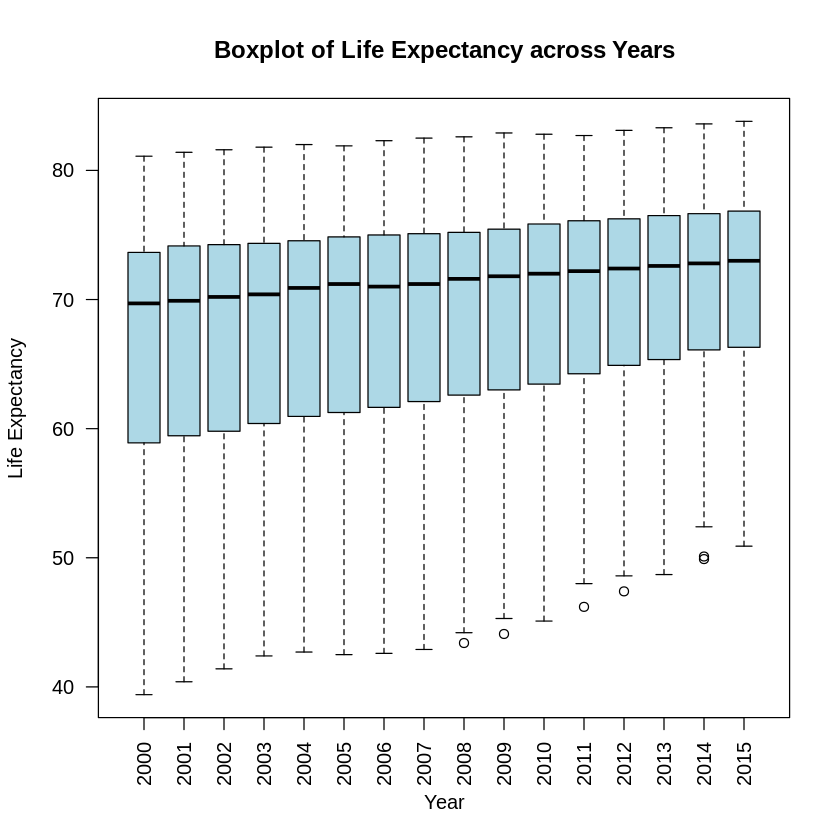

In [ ]:
boxplot(Life_Expectancy ~ Year,
        data = final_data,
        col = "lightblue",
        main = "Boxplot of Life Expectancy across Years",
        xlab = "Year",
        ylab = "Life Expectancy",
        las = 2)

In [ ]:
# Checking for highest and lowest life expectancy each year
for (year in 2000:2015) {
  filter_year = cleaned_data$Year == year

  max_life_expectancy = max(cleaned_data[filter_year, "Life_Expectancy"])
  min_life_expectancy = min(cleaned_data[filter_year, "Life_Expectancy"])

  filter_max = cleaned_data$Life_Expectancy == max_life_expectancy
  filter_min = cleaned_data$Life_Expectancy == min_life_expectancy

  country_max = cleaned_data[filter_max, "Country"]
  country_min = cleaned_data[filter_min, "Country"]

  country_max_string = paste(country_max, collapse = ", ")
  country_min_string = paste(country_min, collapse = ", ")

  cat(paste0(year, "\n",
    "Countries with the highest Life Expectancy at ", max_life_expectancy, ": ", country_max_string, "\n",
    "Countries with the lowest Life Expectancy at ", min_life_expectancy, ": ", country_min_string, "\n\n"))
}

2000
Countries with the highest Life Expectancy at 81.1: Germany, Japan, Austria, Portugal, Portugal, France, Netherlands, Slovenia, Switzerland, Sweden
Countries with the lowest Life Expectancy at 39.4: Sierra Leone

2001
Countries with the highest Life Expectancy at 81.4: France, Sweden, Israel, Italy, Greece, New Zealand, Malta, Canada, Japan, New Zealand, Australia, Luxembourg
Countries with the lowest Life Expectancy at 40.4: Sierra Leone

2002
Countries with the highest Life Expectancy at 81.6: Italy, Iceland, Canada, Spain, Japan, Israel
Countries with the lowest Life Expectancy at 41.4: Sierra Leone

2003
Countries with the highest Life Expectancy at 81.8: Japan, Canada, Sweden, Norway, Iceland, Luxembourg
Countries with the lowest Life Expectancy at 42.4: Sierra Leone

2004
Countries with the highest Life Expectancy at 82: Japan, Sweden, Switzerland, Switzerland, Australia, France, Malta, Italy, Singapore
Countries with the lowest Life Expectancy at 42.7: Eswatini, Eswatini, L

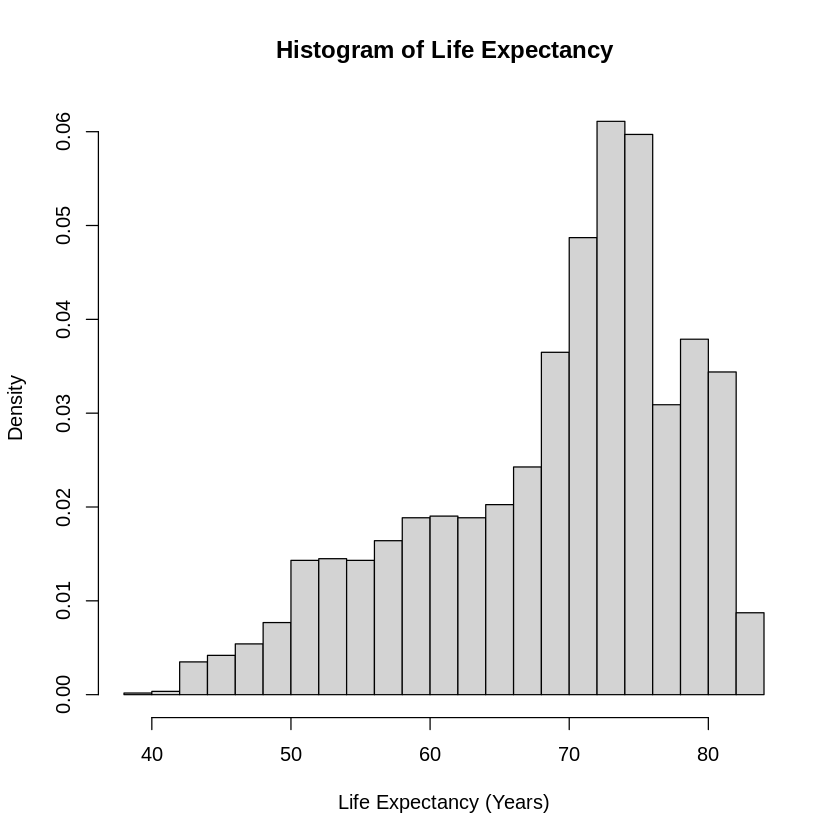

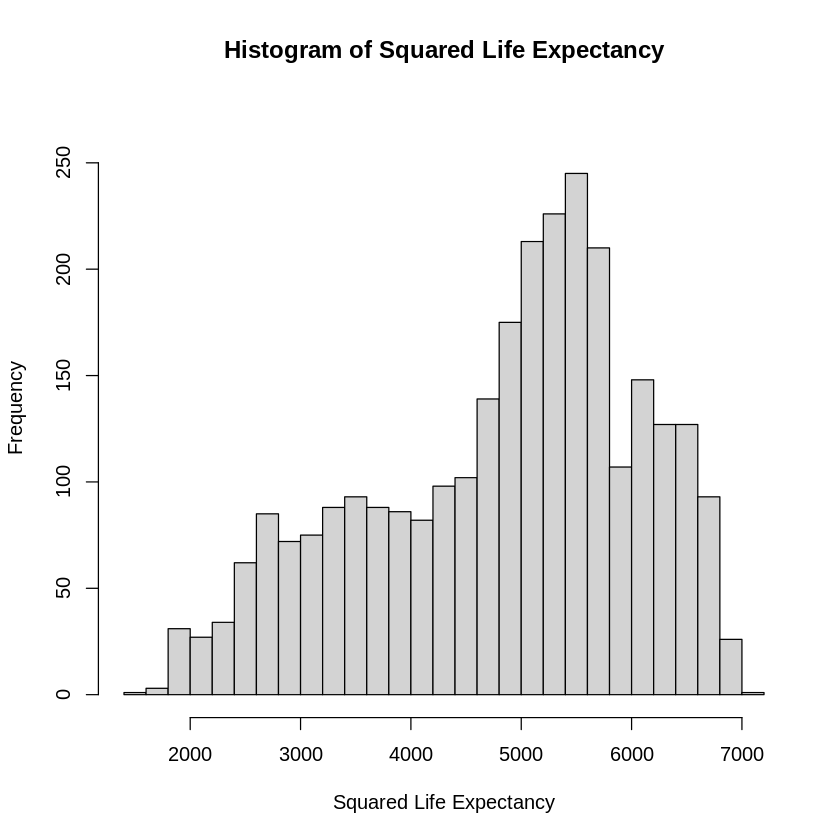

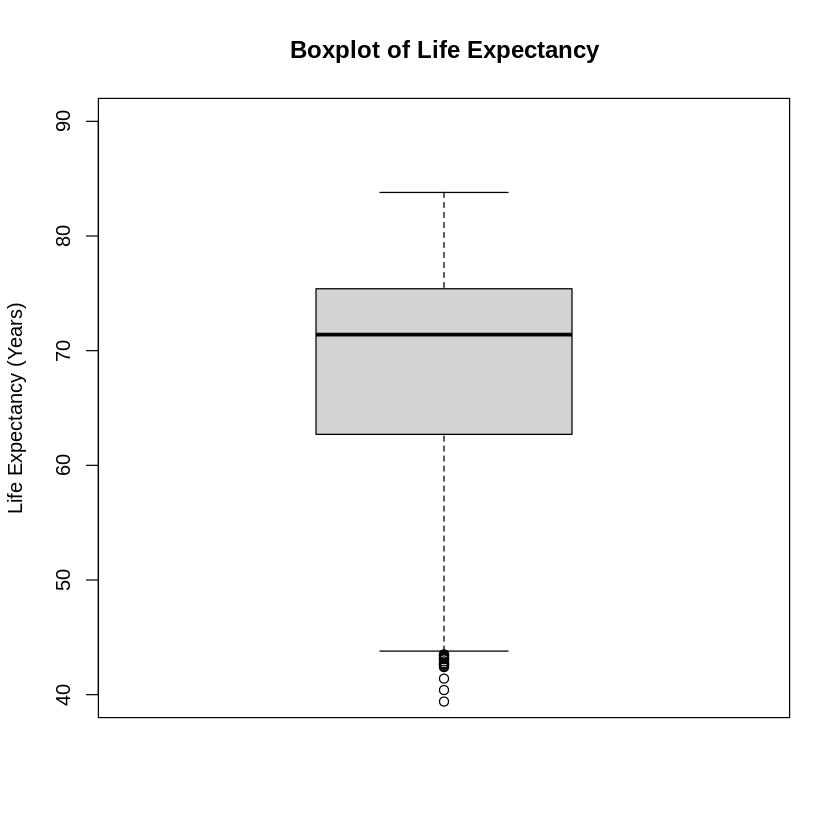

In [ ]:
# Life Expectancy

hist(cleaned_data$Life_Expectancy,
     main = "Histogram of Life Expectancy",
     xlab = "Life Expectancy (Years)",
     breaks = 20,
     freq = FALSE)

cleaned_data$Life_Expectancy_Squared <- cleaned_data$Life_Expectancy^2
hist_data <- hist(cleaned_data$Life_Expectancy_Squared, breaks=20, plot=FALSE)
max_freq <- max(hist_data$counts)

hist(cleaned_data$Life_Expectancy_Squared,
     main="Histogram of Squared Life Expectancy",
     xlab="Squared Life Expectancy",
     breaks=20,
     ylim=c(0, max_freq * 1.1))

boxplot(cleaned_data$Life_Expectancy,
        main = "Boxplot of Life Expectancy",
        ylab = "Life Expectancy (Years)",
        ylim = c(40, 90))


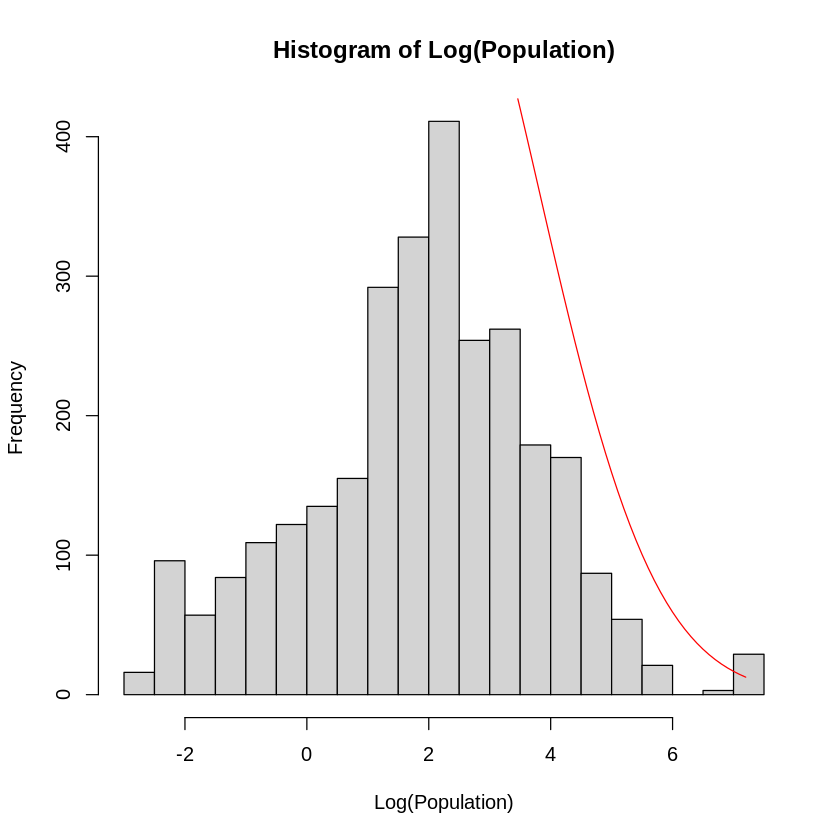

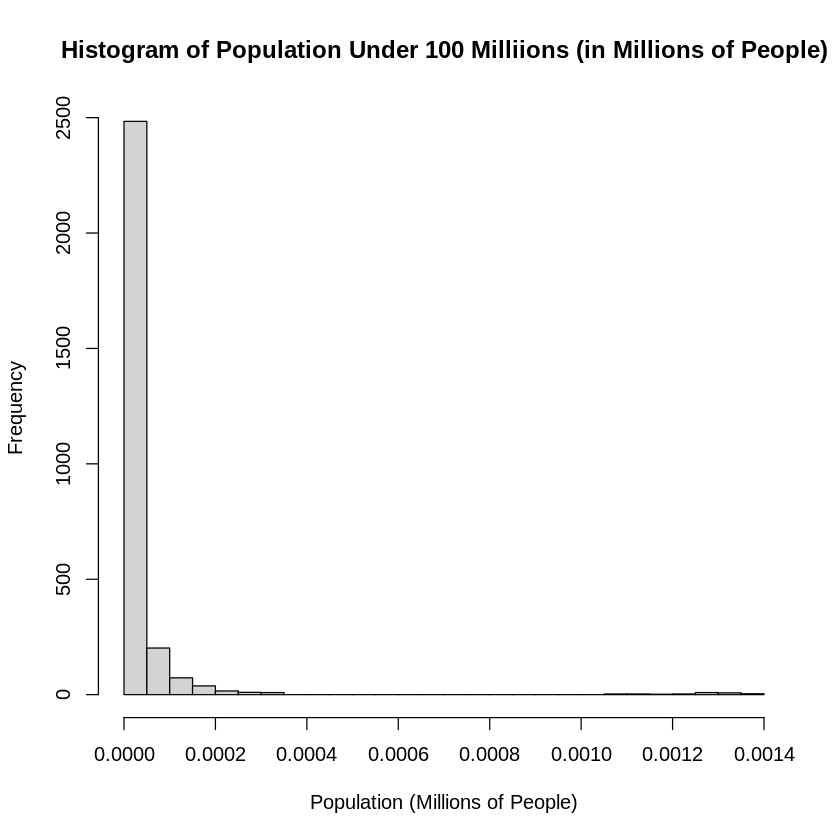

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in hist.default(population_over_100m/1e+06, main = "Histogram of Population Over 100 Milliions (in Millions of People)", : character(0)


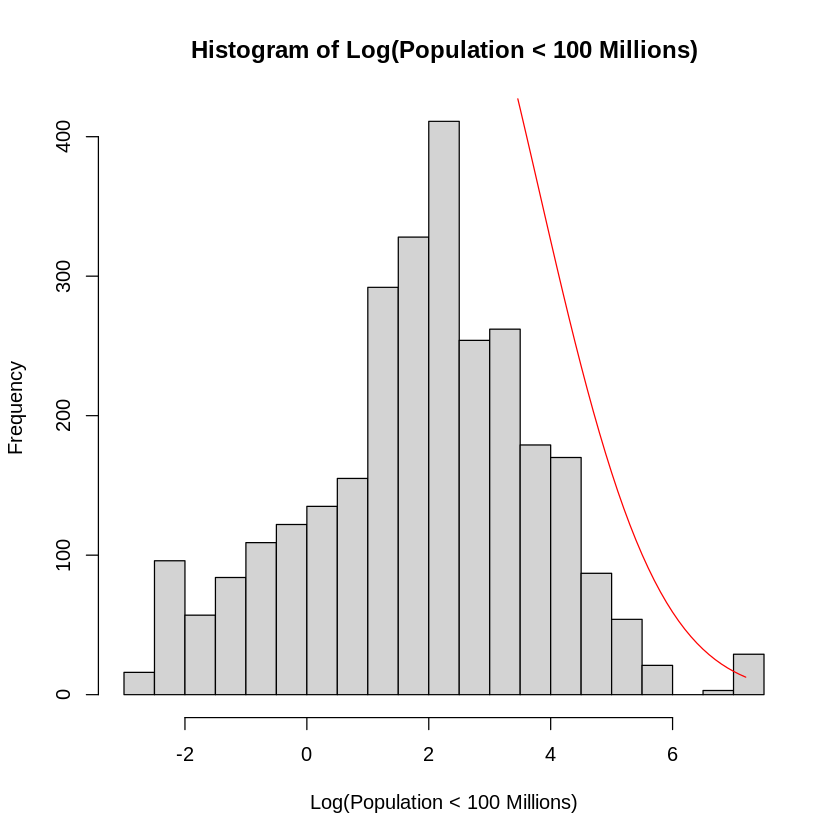

In [ ]:
# Population

hist(log(cleaned_data$Population),
     main="Histogram of Log(Population)",
     xlab="Log(Population)",
     breaks = 20,
     )
xpt = seq(1,max(log(cleaned_data$Population)),by=0.1)
n_den = dnorm( xpt, mean(log(cleaned_data$Population)), sd(log(cleaned_data$Population)) )
ypt = n_den*length( log(cleaned_data$Population) )
lines( xpt , ypt , col = 'red' )


hist(log(population_over_100m),
     main="Histogram of Log(Population > 100 Millions)",
     xlab="Log(Population > 100 Millions)",
     breaks = 20,
     )
xpt = seq(1,max(log(population_over_100m)),by=0.1)
n_den = dnorm( xpt, mean(log(population_over_100m)), sd(log(population_over_100m)) )
ypt = n_den*length( log(population_over_100m) )
lines( xpt , ypt , col = 'red' )

boxplot(cleaned_data$Population/1000000,
        main = "Boxplot of Population (in Millions of People)",
        ylab = "Population (Millions of People)")

boxplot( log(cleaned_data$Population),
        main = "Boxplot of Log(Population)",
        ylab = "Log(Population)")

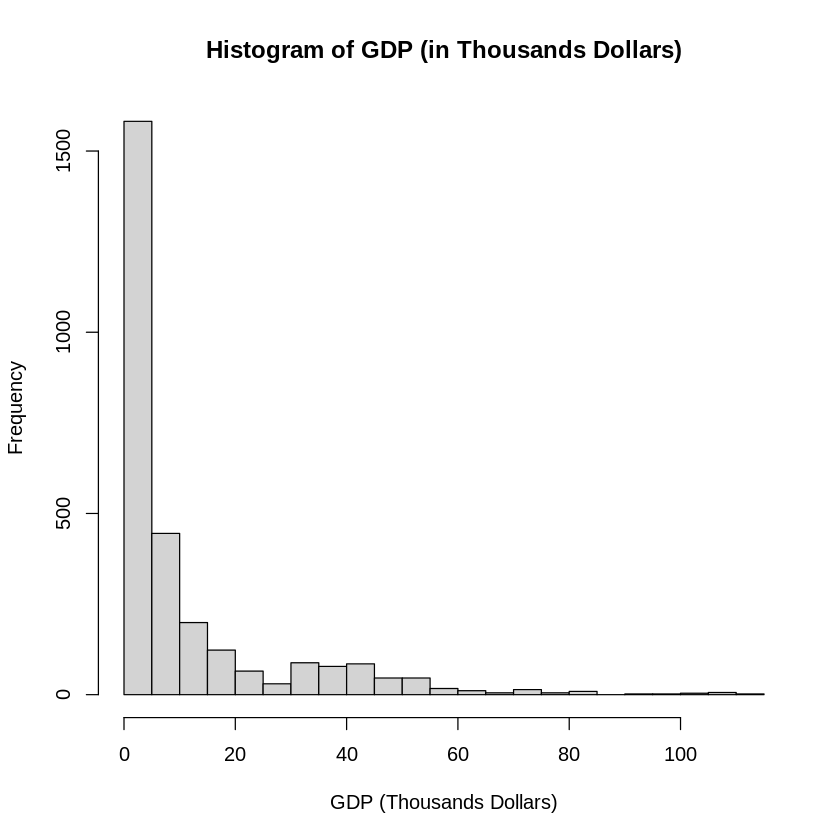

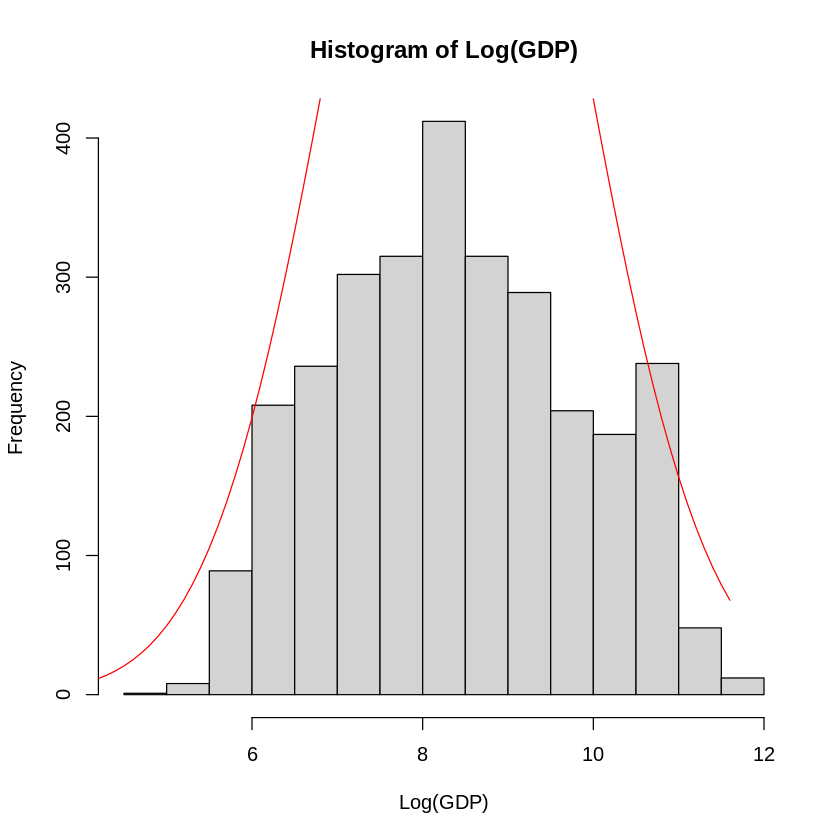

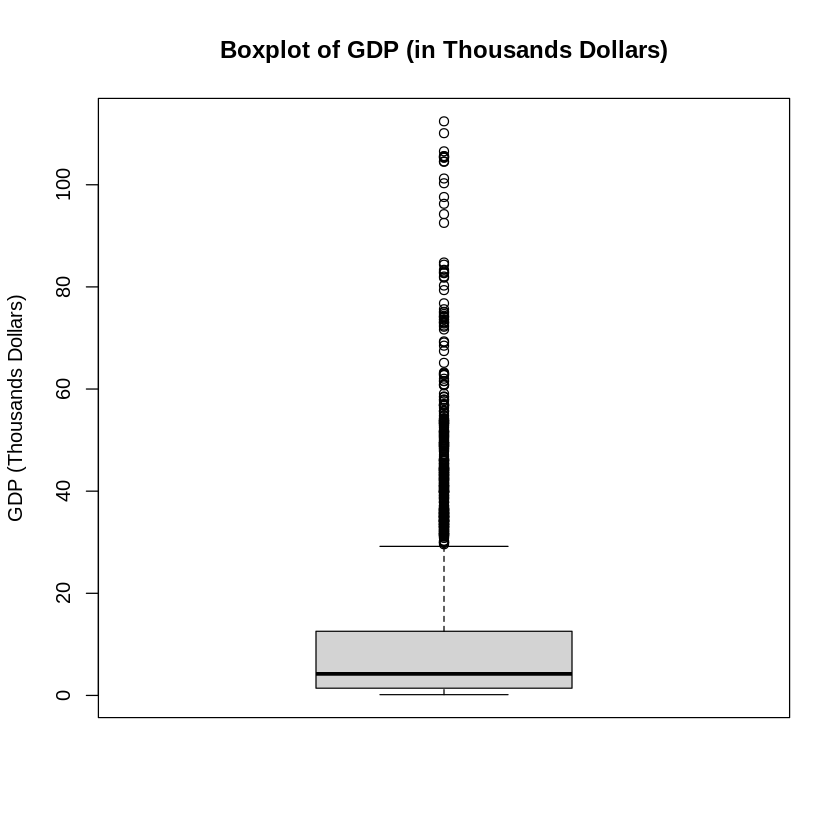

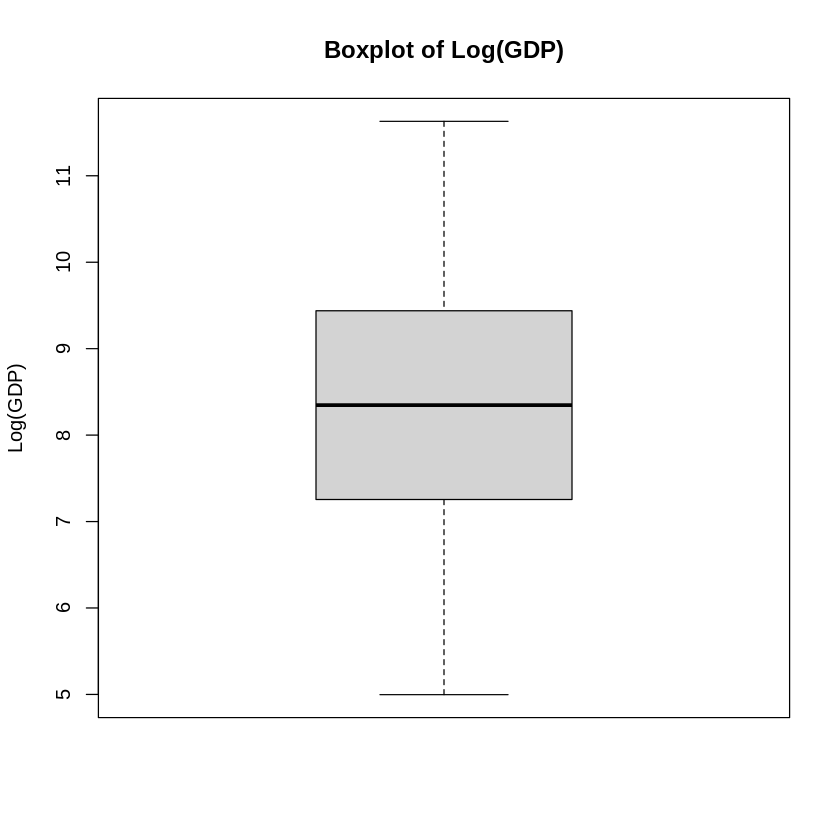

In [ ]:
# GDP
hist(cleaned_data$GDP/1000,
     main="Histogram of GDP (in Thousands Dollars)",
     xlab="GDP (Thousands Dollars)",
     breaks = 20,
     )

hist(log(cleaned_data$GDP),
     main="Histogram of Log(GDP)",
     xlab="Log(GDP)",
     breaks = 20,
     )
xpt = seq(1,max(log(cleaned_data$GDP)),by=0.1)
n_den = dnorm( xpt, mean(log(cleaned_data$GDP)), sd(log(cleaned_data$GDP)) )
ypt = n_den*length( log(cleaned_data$GDP) )
lines( xpt , ypt , col = 'red' )

boxplot( log(cleaned_data$GDP),
        main = "Boxplot of Log(GDP)",
        ylab = "Log(GDP)")

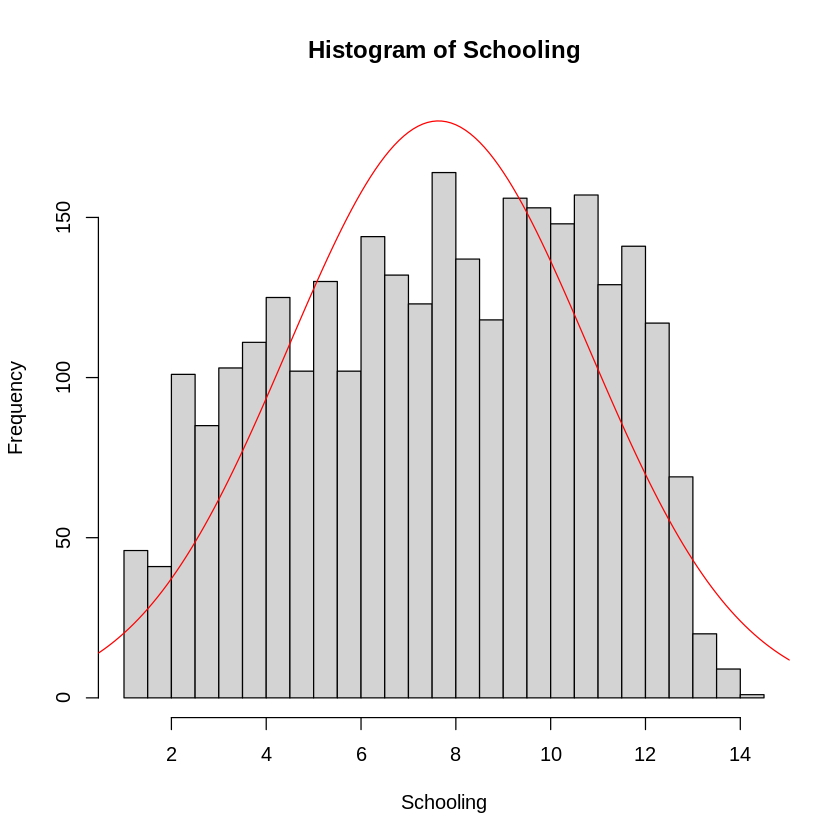

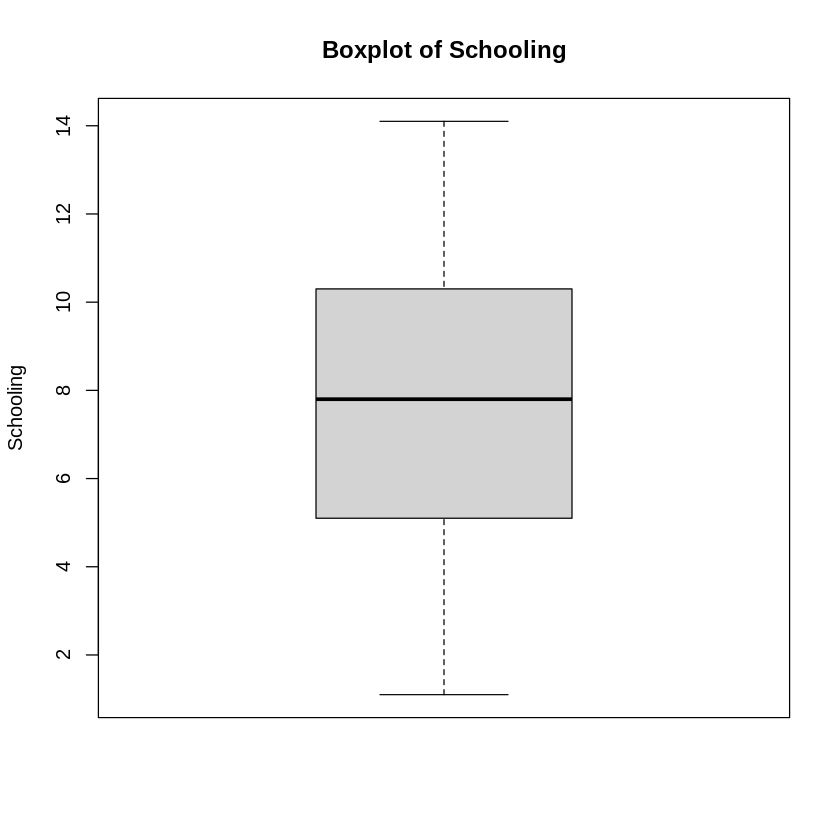

In [ ]:
# Schooling
hist(cleaned_data$Schooling,
     main = "Histogram of Schooling",
     xlab = "Schooling",
     breaks = 20,
     ylim = c(1, 180)
)
xpt = seq(0,25,by=0.1)
n_den = dnorm( xpt, mean(cleaned_data$Schooling), sd(cleaned_data$Schooling) )
ypt = n_den*length( cleaned_data$Schooling ) * 0.5
lines( xpt , ypt , col = 'red' )

boxplot(cleaned_data$Schooling,
        main = "Boxplot of Schooling",
        ylab = "Schooling")


In [ ]:
# BMI
hist(cleaned_data$BMI,
     main="Histogram of BMI",
     xlab="BMI",
     breaks = 20,
)
xpt = seq(19.5,32.5,by=0.1)
n_den = dnorm( xpt, mean(cleaned_data$BMI), sd(cleaned_data$BMI) )
ypt = n_den*length( cleaned_data$BMI ) * 0.5
lines( xpt , ypt , col = 'red' )

boxplot(cleaned_data$BMI,
        main = "Boxplot of BMI",
        ylab = "BMI")



ERROR: Error in hist.default(cleaned_data$Percentage_Expenditure, main = "Histogram of Government Expenditure (%)", : 'x' must be numeric


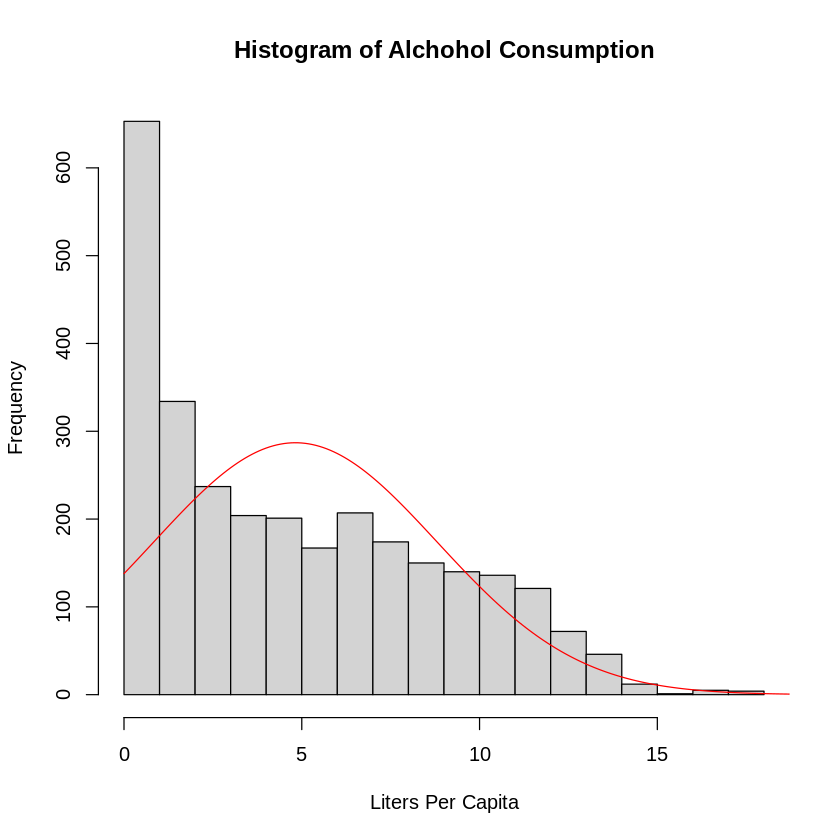

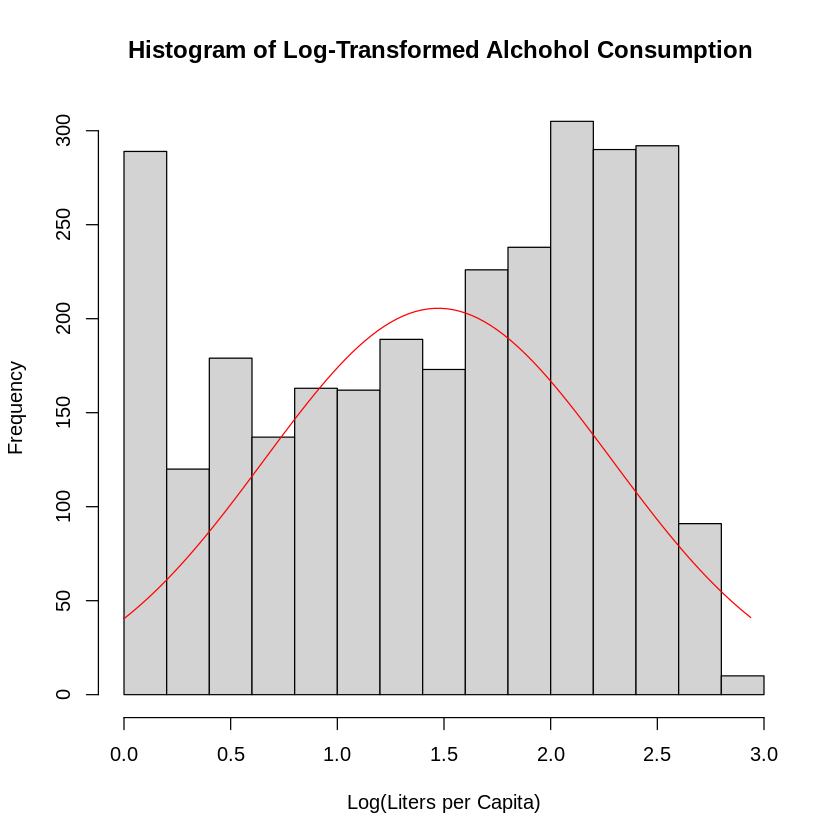

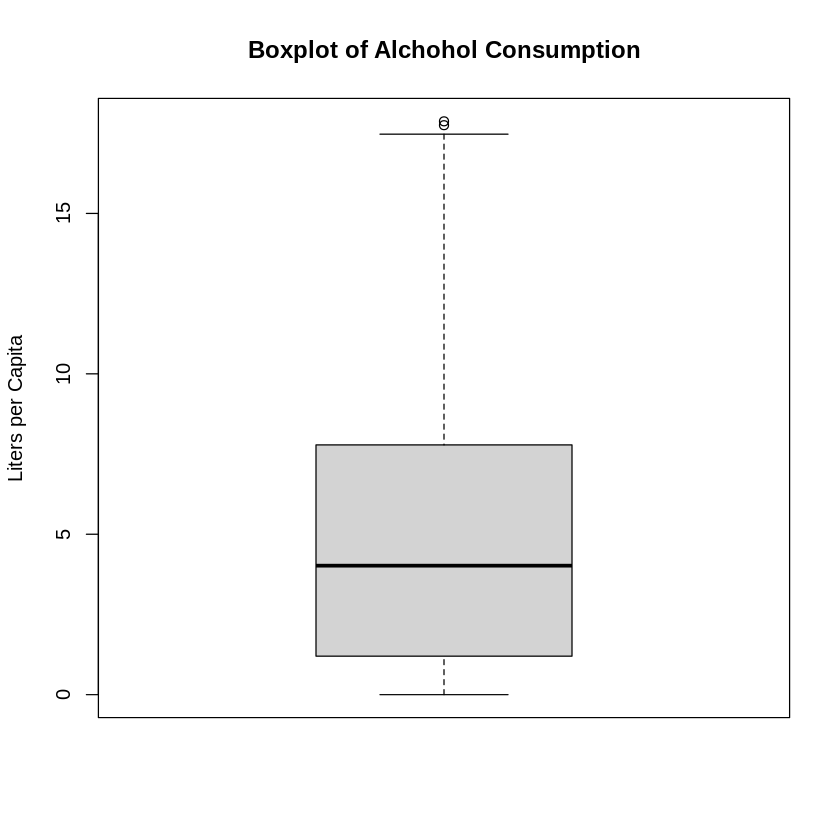

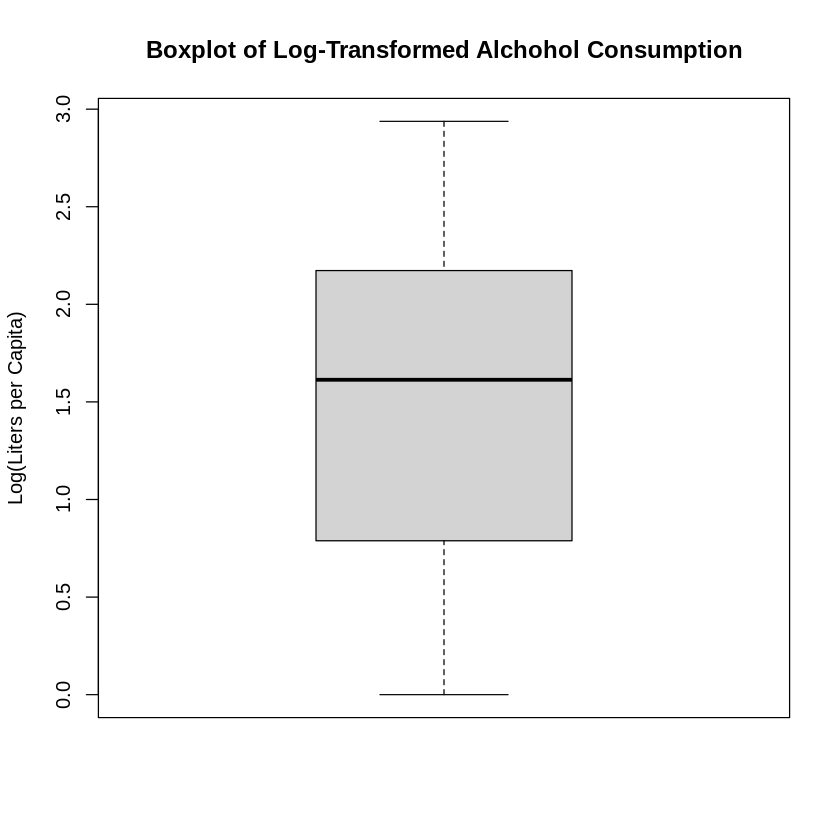

In [ ]:
# Alchohol Consumption
hist(cleaned_data$Alcohol,
     main="Histogram of Alchohol Consumption",
     xlab="Liters Per Capita",
     breaks = 20,
)
xpt = seq(0,25,by=0.1)
n_den = dnorm( xpt, mean(cleaned_data$Alcohol), sd(cleaned_data$Alcohol) )
ypt = n_den*length( cleaned_data$Alcohol ) * 1
lines( xpt , ypt , col = 'red' )

# Apply log transformation to the data
log_alc <- log1p(cleaned_data$Alcohol)  # log1p(x) = log(x + 1) to avoid log(0)

# Plot histogram of log-transformed data
hist(log_alc,
     main="Histogram of Log-Transformed Alchohol Consumption ",
     xlab="Log(Liters per Capita)",
     breaks=20,
     )

xpt = seq(min(log_alc), max(log_alc), length.out=100)
n_den = dnorm(xpt, mean(log_alc), sd(log_alc))
ypt = n_den * length(log_alc) * diff(range(log_alc)) / 20
lines(xpt, ypt, col='red')

boxplot(cleaned_data$Alcohol,
        main = "Boxplot of Alchohol Consumption",
        ylab = "Liters per Capita")

boxplot(log_alc,
        main = "Boxplot of Log-Transformed Alchohol Consumption",
        ylab = "Log(Liters per Capita)")

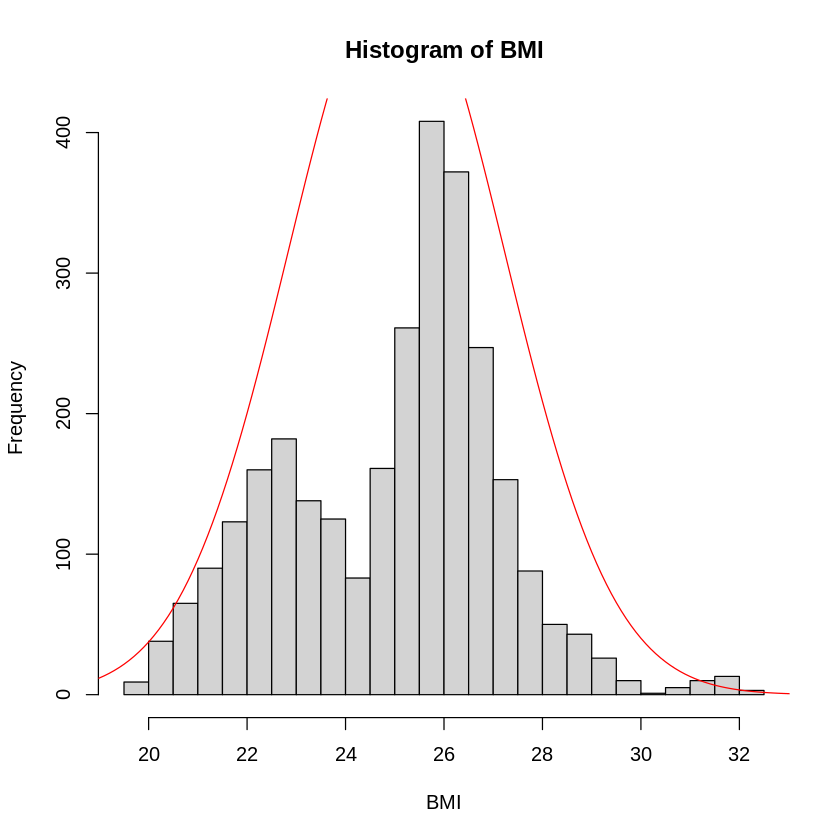

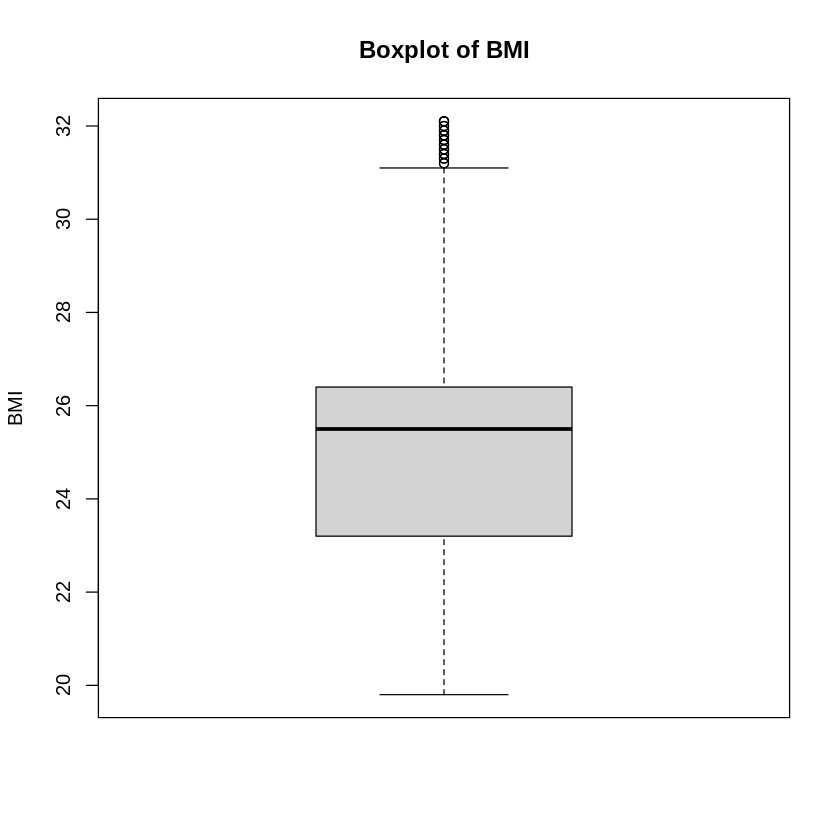

In [ ]:
# BMI

hist(cleaned_data$BMI,
     main="Histogram of BMI",
     xlab="BMI",
     breaks = 20,
)

xpt = seq(0,80,by=0.1)
n_den = dnorm( xpt, mean(cleaned_data$BMI), sd(cleaned_data$BMI) )
ypt = n_den*length( cleaned_data$BMI ) * 1
lines( xpt , ypt , col = 'red' )

boxplot(cleaned_data$BMI,
        main = "Boxplot of BMI",
        ylab = "BMI")

In [ ]:
cleaned_data$Country[ cleaned_data$Schooling == min( cleaned_data$Schooling ) ]

[1] "Niger"

In [ ]:
#LE vs Log(Percentage Expenditure)

##Checking for NA/NaN/Inf values
sum(is.na(final_data$Log_Percentage_Expenditure))
sum(is.infinite(final_data$Log_Percentage_Expenditure))
##Removing Inf Values (Occurs when percentage == 1)
final_data <- final_data[complete.cases(final_data$Log_Percentage_Expenditure), ]
final_data <- final_data_clean[!is.infinite(final_data_clean$Log_Percentage_Expenditure), ]
lm_model_ge <- lm(Life_Expectancy ~ Log_Percentage_Expenditure, data = final_data)
summary(lm_model_ge)

In [ ]:
# Scatter plot with regression line
plot(final_data$Log_Percentage_Expenditure, final_data$Life_Expectancy,
     main = "Life Expectancy vs Log(Percentage Expenditure)",
     xlab = "Log(Percentage Expenditure)",
     ylab = "Life Expectancy",
     col = "blue",
     pch = 19)
abline(lm(Life_Expectancy ~ Log_Percentage_Expenditure, data = final_data), col = "red", lwd = 2)

In [ ]:
#LE vs Alcohol

lm_model_ac <- lm(Life_Expectancy ~ Alcohol, data = final_data)
summary(lm_model_ac)

# Scatter plot with regression line
plot(final_data$Alcohol, final_data$Life_Expectancy,
     main = "Life Expectancy vs Alcohol Consumption",
     xlab = "Alcohol Consumption",
     ylab = "Life Expectancy",
     col = "blue",
     pch = 19)
abline(lm(Life_Expectancy ~ Alcohol, data = final_data), col = "red", lwd = 2)


Call:
lm(formula = Life_Expectancy ~ BMI, data = final_data)

Coefficients:
(Intercept)          BMI  
      4.633        2.566  


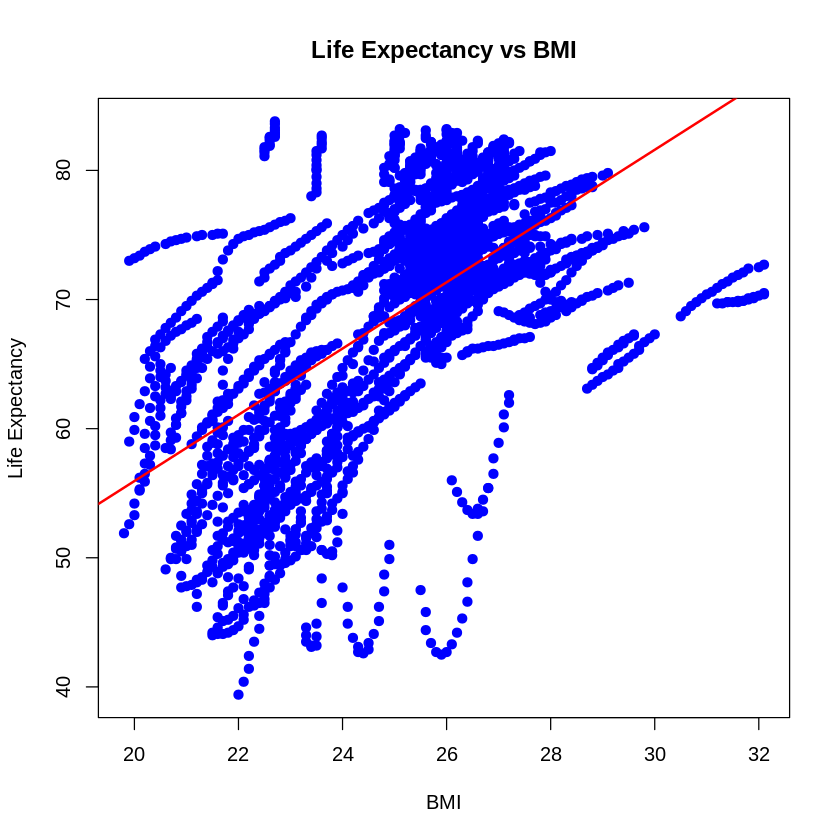

In [ ]:
# LE BMI

# Scatter plot with regression line
plot(final_data$BMI, final_data$Life_Expectancy,
     main = "Life Expectancy vs BMI",
     xlab = "BMI",
     ylab = "Life Expectancy",
     col = "blue",
     pch = 19)

# Add regression line
abline(lm(Life_Expectancy ~ BMI, data = final_data), col = "red", lwd = 2)
lm(formula = Life_Expectancy ~ BMI, data = final_data)


Call:
lm(formula = Life_Expectancy ~ poly(BMI, degree = 3), data = data_2015)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7352  -3.6997  -0.2413   4.2111  19.3451 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              71.464      0.470 152.047  < 2e-16 ***
poly(BMI, degree = 3)1   55.111      6.288   8.764  1.6e-15 ***
poly(BMI, degree = 3)2  -24.180      6.288  -3.845 0.000168 ***
poly(BMI, degree = 3)3  -19.428      6.288  -3.090 0.002332 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.288 on 175 degrees of freedom
Multiple R-squared:  0.3663,	Adjusted R-squared:  0.3554 
F-statistic: 33.71 on 3 and 175 DF,  p-value: < 2.2e-16


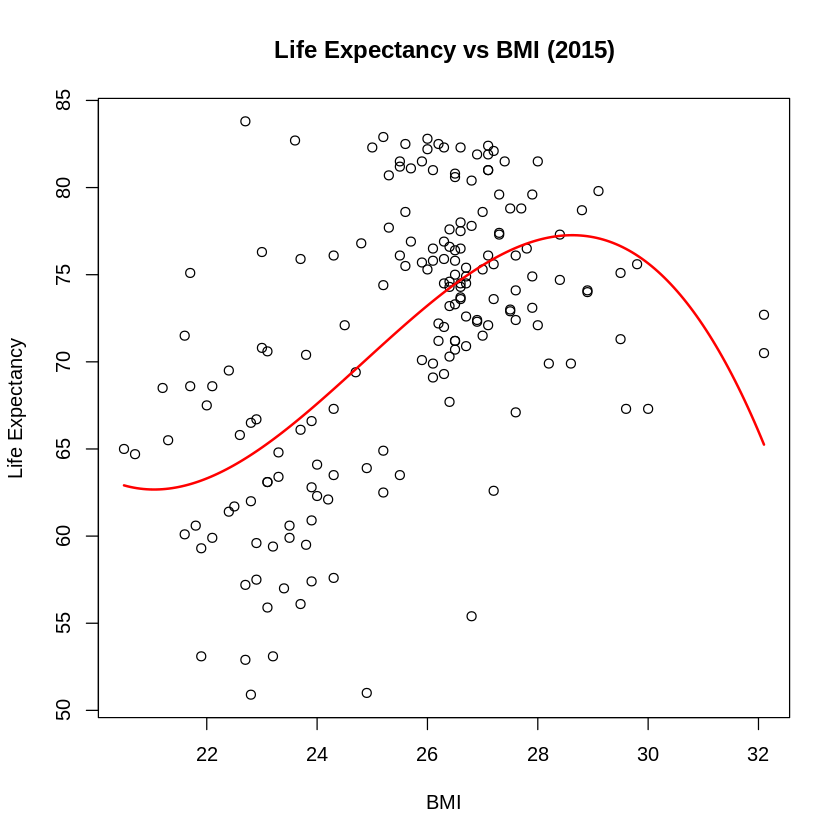

In [ ]:
# Subset the data for 2015
data_2015 <- subset(final_data, Year == 2015)

# Fit the polynomial model
model <- lm(Life_Expectancy ~ poly(BMI, degree = 3), data = data_2015)

# Scatter plot of data
plot(data_2015$BMI, data_2015$Life_Expectancy,
     xlab = "BMI", ylab = "Life Expectancy",
     main = "Life Expectancy vs BMI (2015)")

# Create a sequence of BMI values for prediction
bmi_seq <- seq(min(data_2015$BMI, na.rm = TRUE),
               max(data_2015$BMI, na.rm = TRUE),
               length.out = 200)

# Predict Life Expectancy using the model
predicted_life <- predict(model, newdata = data.frame(BMI = bmi_seq))

# Add the polynomial regression curve
lines(bmi_seq, predicted_life, col = "red", lwd = 2)

summary(model)


Call:
lm(formula = Life_Expectancy ~ poly(BMI, degree = 2), data = data_2015)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.3807  -3.4332   0.1457   4.3047  18.6548 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             71.4637     0.4813 148.485  < 2e-16 ***
poly(BMI, degree = 2)1  55.1107     6.4392   8.559 5.49e-15 ***
poly(BMI, degree = 2)2 -24.1803     6.4392  -3.755 0.000235 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.439 on 176 degrees of freedom
Multiple R-squared:  0.3317,	Adjusted R-squared:  0.3241 
F-statistic: 43.68 on 2 and 176 DF,  p-value: 3.961e-16


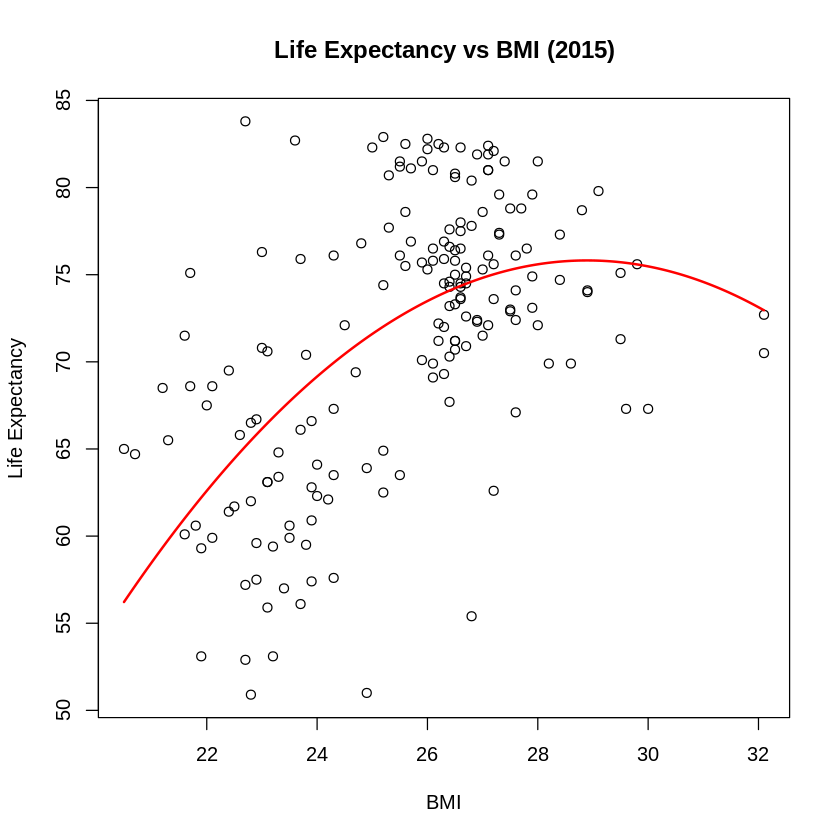

In [ ]:
# Subset the data for 2015
data_2015 <- subset(final_data, Year == 2015)

# Fit the polynomial model
model <- lm(Life_Expectancy ~ poly(BMI, degree = 2), data = data_2015)

# Scatter plot of data
plot(data_2015$BMI, data_2015$Life_Expectancy,
     xlab = "BMI", ylab = "Life Expectancy",
     main = "Life Expectancy vs BMI (2015)")

# Create a sequence of BMI values for prediction
bmi_seq <- seq(min(data_2015$BMI, na.rm = TRUE),
               max(data_2015$BMI, na.rm = TRUE),
               length.out = 200)

# Predict Life Expectancy using the model
predicted_life <- predict(model, newdata = data.frame(BMI = bmi_seq))

# Add the polynomial regression curve
lines(bmi_seq, predicted_life, col = "red", lwd = 2)

summary(model)


Call:
lm(formula = Life_Expectancy ~ poly(BMI, degree = 1), data = data_2015)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.1517  -3.8095   0.3442   4.1269  17.7947 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            71.4637     0.4988 143.277  < 2e-16 ***
poly(BMI, degree = 1)  55.1107     6.6732   8.258 3.32e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.673 on 177 degrees of freedom
Multiple R-squared:  0.2781,	Adjusted R-squared:  0.2741 
F-statistic:  68.2 on 1 and 177 DF,  p-value: 3.325e-14


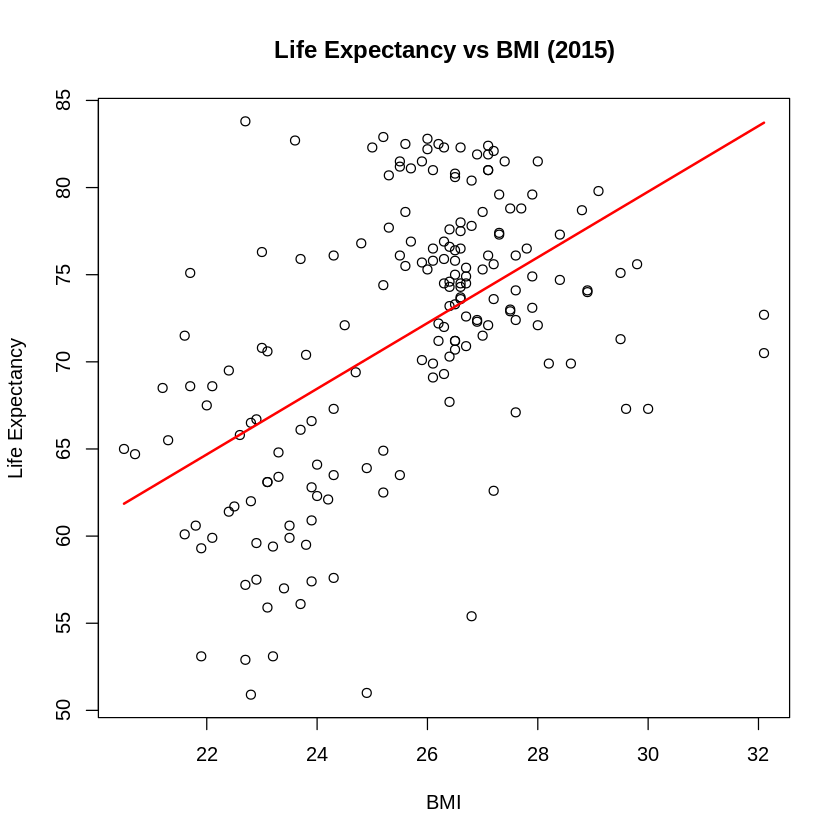

In [ ]:
# Subset the data for 2015
data_2015 <- subset(final_data, Year == 2015)

# Fit the polynomial model
model <- lm(Life_Expectancy ~ poly(BMI, degree = 1), data = data_2015)

# Scatter plot of data
plot(data_2015$BMI, data_2015$Life_Expectancy,
     xlab = "BMI", ylab = "Life Expectancy",
     main = "Life Expectancy vs BMI (2015)")

# Create a sequence of BMI values for prediction
bmi_seq <- seq(min(data_2015$BMI, na.rm = TRUE),
               max(data_2015$BMI, na.rm = TRUE),
               length.out = 200)

# Predict Life Expectancy using the model
predicted_life <- predict(model, newdata = data.frame(BMI = bmi_seq))

# Add the polynomial regression curve
lines(bmi_seq, predicted_life, col = "red", lwd = 2)

summary(model)

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

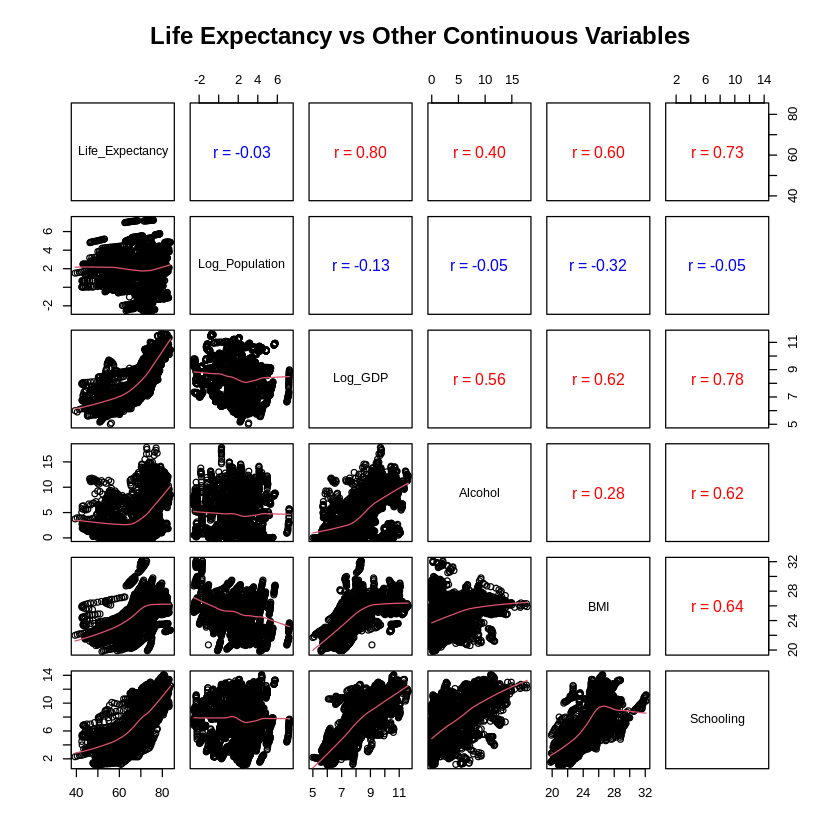

In [ ]:
# Custom panel to show correlation coefficient
panel.cor <- function(x, y, digits = 2, prefix = "r = ", ...) {
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- cor(x, y, use = "complete.obs")
  txt <- paste0(prefix, formatC(r, digits = digits, format = "f"))
  col <- ifelse(r > 0, "red", "blue")
  text(0.5, 0.5, txt, cex = 1.2, col = col)
}

# Create a subset with Life_Expectancy and the continuous predictors
selected_data <- final_data[, c("Life_Expectancy", "Log_Population", "Log_GDP", "Alcohol", "BMI", "Schooling")]

# Create the pairs plot
pairs(selected_data,
      upper.panel = panel.cor,
      lower.panel = panel.smooth,
      main = "Life Expectancy vs Other Continuous Variables")

In [ ]:
# By Development Status

# Convert development status to numeric
final_data$Status_numeric <- ifelse(final_data$Status == "Developed", 1, 0)

# Compute correlations
numeric_data <- na.omit(final_data[sapply(final_data, is.numeric)])
cor_life <- cor(numeric_data, use = "pairwise.complete.obs")[, "Life_Expectancy"]
cor_status <- cor(numeric_data, use = "pairwise.complete.obs")[, "Status_numeric"]

cor_df <- data.frame(
  Variable = names(cor_life),
  Corr_with_Life_Expectancy = cor_life,
  Corr_with_Status = cor_status
)
cor_df <- cor_df[cor_df$Variable != "Life_Expectancy" & cor_df$Variable != "Year", ]
cor_df$Variable <- as.character(cor_df$Variable)

# Plot formatting
cor_df$Corr_with_Life_Expectancy <- round(cor_df$Corr_with_Life_Expectancy, 3)
cor_df$Corr_with_Status <- round(cor_df$Corr_with_Status, 3)
cor_df$Type <- ifelse(cor_df$Variable %in% c("Hepatitis_B", "Polio", "Diphtheria", "Measles"), "Vaccine", "Other")

library(ggplot2)
library(ggrepel)

# Plot
ggplot(cor_df, aes(x = Corr_with_Status, y = Corr_with_Life_Expectancy, label = Variable)) +
  geom_point(aes(color = Type), size = 3) +
  geom_text_repel(size = 3.5, max.overlaps = 100) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "grey") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "grey") +
  scale_color_manual(values = c("Vaccine" = "firebrick", "Other" = "steelblue")) +
  labs(
    title = "Bivariate Correlation Map of Life Expectancy Predictors",
    x = "Correlation with Development Status",
    y = "Correlation with Life Expectancy",
    color = "Variable Type"
  ) +
  theme_minimal()

# If you want to see the correlation table
View(cor_df)

In [ ]:
# Plots of Immunization by Status

par(mfrow = c(1, 4))

# Boxplot: Hepatitis B
boxplot(Hepatitis_B ~ Status, data = final_data,
        main = "Hepatitis B Coverage by Status",
        ylab = "Coverage (%)",
        col = c("skyblue", "lightgreen"))

# Boxplot: Polio
boxplot(Polio ~ Status, data = final_data,
        main = "Polio Coverage by Status",
        ylab = "Coverage (%)",
        col = c("skyblue", "lightgreen"))

# Boxplot: Diphtheria
boxplot(Diphtheria ~ Status, data = final_data,
        main = "Diphtheria Coverage by Status",
        ylab = "Coverage (%)",
        col = c("skyblue", "lightgreen"))

# Optional: Measles (if you want to include it)
boxplot(Measles ~ Status, data = final_data,
        main = "Measles Coverage by Status",
        ylab = "Coverage (%)",
        col = c("skyblue", "lightgreen"))
